<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Piyush Rai - 4 MCA B - 2247226

# CAT 1

### Importing necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

### Importing the datasets

In [ ]:
data_copy = pd.read_csv('India_Menu.csv')
data = pd.read_csv('India_Menu.csv')
df2 = pd.read_csv('Salaries.csv')
df2_copy = pd.read_csv('Salaries.csv')

# Dataset 1 - India Menu

## Task - PCA

In [ ]:
print("Find if there is any Null Value \n\n")

data_copy.isna().sum()

Find if there is any Null Value 




Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [ ]:
sodium_mean = data['Sodium (mg)'].mean()

In [ ]:
data = data.fillna(sodium_mean)

In [ ]:
data.isna().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [ ]:
data.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [ ]:
data = data.drop('Menu Category',axis=1)

In [ ]:
data = data.drop('Menu Items',axis=1)

In [ ]:
data.head()

,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [ ]:
## Standardization
X = data.drop(['Per Serve Size'], axis='columns')
y = data['Per Serve Size']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Values: ", X_scaled)

Scaled Values:  [[ 0.85136953  0.33060939  0.3725497  ... -0.48386011 -0.41081255
   0.73237795]
 [ 0.5131788   0.12115372  0.12795554 ... -0.53822718 -0.44032217
   0.39012065]
 [ 2.2073234   1.54039644  2.85925698 ... -0.45507754 -0.35600897
   1.51665995]
 ...
 [-1.04710652 -0.53369619 -0.58253225 ... -0.95461496 -0.72628441
  -0.38977643]
 [-1.07928683 -0.72509533 -0.87274517 ... -0.82669245 -0.72628441
  -0.77060393]
 [-0.93233909 -0.82380432 -0.96786512 ...  0.08731392 -0.72628441
  -0.74770021]]


In [ ]:
## Covariance
X_scaled = pd.DataFrame(X_scaled)
cov_matrix = X_scaled.cov()
cov_matrix

,0,1,2,3,4,5,6,7,8,9
0,1.007143,0.832739,0.915132,0.804148,0.081983,0.382097,0.821429,0.063759,0.003665,0.857275
1,0.832739,1.007143,0.881848,0.707734,0.190545,0.594246,0.418183,-0.284896,-0.321512,0.905705
2,0.915132,0.881848,1.007143,0.849405,0.159532,0.427370,0.542324,-0.221697,-0.282465,0.879575
3,0.804148,0.707734,0.849405,1.007143,-0.076977,0.365729,0.529593,-0.050794,-0.175474,0.642064
4,0.081983,0.190545,0.159532,-0.076977,1.007143,-0.029893,-0.124117,-0.082884,-0.067604,0.155235
5,0.382097,0.594246,0.427370,0.365729,-0.029893,1.007143,0.143854,-0.207168,-0.227212,0.477592
6,0.821429,0.418183,0.542324,0.529593,-0.124117,0.143854,1.007143,0.512341,0.458299,0.502022
7,0.063759,-0.284896,-0.221697,-0.050794,-0.082884,-0.207168,0.512341,1.007143,0.918683,-0.301140
8,0.003665,-0.321512,-0.282465,-0.175474,-0.067604,-0.227212,0.458299,0.918683,1.007143,-0.274927
9,0.857275,0.905705,0.879575,0.642064,0.155235,0.477592,0.502022,-0.301140,-0.274927,1.007143


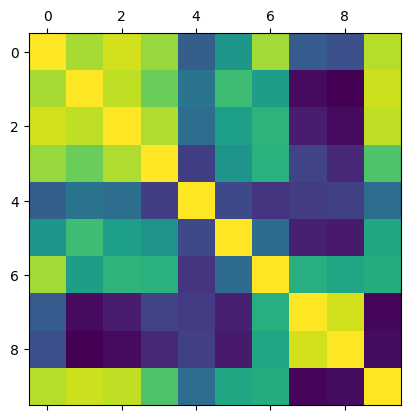

In [ ]:
plt.matshow(X_scaled.corr())
plt.show()

In [ ]:
## Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
## Accuracy
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.13793103448275862

In [ ]:
## Eigen Values
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(cov_matrix)

In [ ]:
print(f"Eigen Values = {eigenvalues} \n Eigen Vector = {eigenvectors}")

Eigen Values = [5.06696620e+00 2.45530938e+00 1.06405567e+00 7.44863986e-01
 3.71951407e-01 1.71338177e-01 4.32018242e-03 9.08514549e-02
 4.79423896e-02 5.38297225e-02] 
 Eigen Vector = [[ 0.42057454  0.18399808  0.0468026   0.1175193   0.10773407  0.1950843
   0.83773174  0.07234105  0.12853302 -0.00689608]
 [ 0.41743923 -0.09470343  0.07477641 -0.13600893  0.09409167 -0.45323242
  -0.18488869  0.63976859  0.32950011  0.16234205]
 [ 0.42910599 -0.02172615  0.06441583  0.16891168 -0.13702189 -0.03515384
  -0.22903177 -0.22633473  0.19518438 -0.7879878 ]
 [ 0.37338272  0.06747037 -0.1757302   0.24096811 -0.73217513 -0.08101234
  -0.07679152 -0.1809121  -0.11337911  0.41588699]
 [ 0.04716201 -0.11362827  0.93470457 -0.1371521  -0.18720297  0.19347063
  -0.04342181 -0.05210214 -0.02450811  0.12126196]
 [ 0.24770832 -0.12917718 -0.23346394 -0.88291967 -0.1277976   0.22666574
   0.01993158 -0.13466083 -0.02604309 -0.03134746]
 [ 0.26910781  0.46600964 -0.04908023  0.1010381   0.28906329  0.

In [ ]:
## Dimension Reduction
k = 4
topEigen = eigenvectors[:,:k]
reducedData = X_scaled.dot(topEigen)
# New Data
print("Reduced Data: ")
reducedData.head()

Reduced Data: 


,0,1,2,3
0,1.281292,0.192149,0.022132,0.867540
1,0.644829,-0.028614,0.003293,0.759239
2,4.679602,0.290247,-0.091922,1.495359
3,5.204363,0.088300,-0.326727,1.431948
4,3.000826,0.209168,-0.073700,0.874773


In [ ]:
## KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn)
y_pred = knn.predict(X_test)

KNeighborsClassifier()


In [ ]:
## Confusion
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Dataset 2 - Salaries

In [ ]:
df2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df_process = df2.drop('work_year',axis=1)

In [ ]:
df_process.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Statisctical Information about Dataset - Salaries

In [ ]:
df2.info()
print("\n")
df_process.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB




,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4126709773256968411, *['salary'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4126709773256968411, *['salary_in_usd'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4126709773256968411, *['remote_ratio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4126709773256968411, *['salary'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4126709773256968411, *['salary_in_usd'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4126709773256968411, *['remote_ratio'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4126709773256968411 = autoviz.get_df('df_4126709773256968411')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4126709773256968411, *[[['salary', 'salary_in_usd'], ['salary_in_usd', 'remote_ratio']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df2.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print("Find if there is any Null Value \n\n")

df2.isna().sum()

Find if there is any Null Value 




work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
print(f"Median Salary : {df2['salary_in_usd'].median()}")

Median Salary : 101570.0


In [ ]:
print(f"Unique Employee Residence Countries : {df2['employee_residence'].nunique()}")

Unique Employee Residence Countries : 57


In [ ]:
print(f"Unique Job Titles : {df2['job_title'].nunique()}")

Unique Job Titles : 50


In [ ]:
def min_max(x):
  min = np.min(x)
  max = np.max(x)
  new_min = 0
  new_max = 1

  minmax = ((x-min)/(max-min))*(new_max-new_min)+new_min

  return minmax

In [ ]:
df2[['salary_in_usd','salary']].apply(min_max)

,salary_in_usd,salary
0,0.128904,0.002171
1,0.430620,0.008422
2,0.177789,0.002665
3,0.028705,0.000526
4,0.246409,0.004803
...,...,...
602,0.253108,0.004935
603,0.206218,0.004014
604,0.211242,0.004112
605,0.246409,0.004803


import numpy as np
from google.colab import autoviz
df_3635579970338822632 = autoviz.get_df('df_3635579970338822632')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3635579970338822632, *['salary_in_usd'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3635579970338822632 = autoviz.get_df('df_3635579970338822632')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3635579970338822632, *['salary'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3635579970338822632 = autoviz.get_df('df_3635579970338822632')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3635579970338822632, *['salary_in_usd'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3635579970338822632 = autoviz.get_df('df_3635579970338822632')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3635579970338822632, *['salary'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3635579970338822632 = autoviz.get_df('df_3635579970338822632')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3635579970338822632, *[[['salary_in_usd', 'salary']]], **{})
chart

Text(0.5, 1.0, 'Trend in Salary over 3 years')

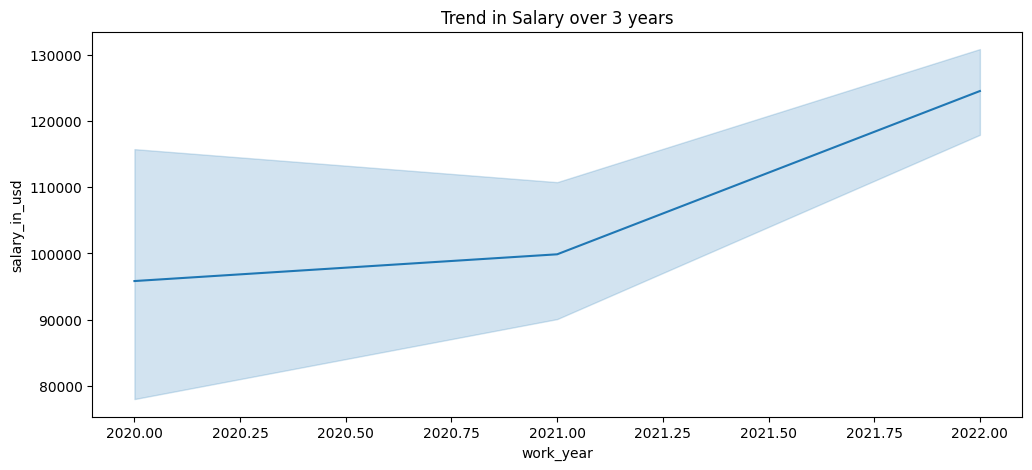

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df2_copy,x='work_year',y='salary_in_usd')
plt.title("Trend in Salary over 3 years")